<a href="https://colab.research.google.com/github/SamreenAK143/cognifyz-restaurant-data-analysis/blob/main/cog_level_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("Dataset .csv")

In [4]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


#level 3
#Task1: Restaurant Reviews
#1a) Analyze the text reviews to identify the most common positive and negative keywords.


In [5]:
print(df['Rating text'])

0       Excellent
1       Excellent
2       Very Good
3       Excellent
4       Excellent
          ...    
9546    Very Good
9547    Very Good
9548         Good
9549    Very Good
9550    Very Good
Name: Rating text, Length: 9551, dtype: object


In [6]:
positive_data=df.loc[df['Aggregate rating']>=2.5]
print(positive_data)

      Restaurant ID           Restaurant Name  Country Code              City  \
0           6317637          Le Petit Souffle           162       Makati City   
1           6304287          Izakaya Kikufuji           162       Makati City   
2           6300002    Heat - Edsa Shangri-La           162  Mandaluyong City   
3           6318506                      Ooma           162  Mandaluyong City   
4           6314302               Sambo Kojin           162  Mandaluyong City   
...             ...                       ...           ...               ...   
9546        5915730               Naml? Gurme           208         ??stanbul   
9547        5908749              Ceviz A??ac?           208         ??stanbul   
9548        5915807                     Huqqa           208         ??stanbul   
9549        5916112               A???k Kahve           208         ??stanbul   
9550        5927402  Walter's Coffee Roastery           208         ??stanbul   

                           

In [7]:
positive_keywords=positive_data['Rating text'].unique()
print(positive_keywords)

['Excellent' 'Very Good' 'Good' 'Average']


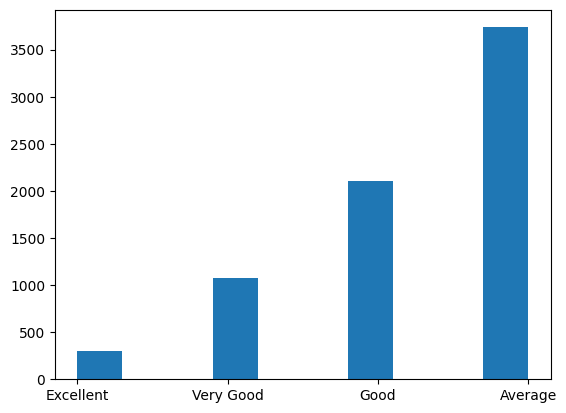

In [8]:
plt.hist(positive_data['Rating text'],label=positive_keywords)
plt.show()

In [9]:
negative_data=df.loc[df['Aggregate rating']<2.5]
print(negative_data)

      Restaurant ID               Restaurant Name  Country Code  \
30          6600060                Sandubas Caf??            30   
58          7305048         Quiosque Chopp Brahma            30   
69          6710645              Cantinho da Gula            30   
77          6701419                 Divino Fog??o            30   
78          6703956                   Super Grill            30   
...             ...                           ...           ...   
9111       18254559                      Platters             1   
9112       18255132                     The Grand             1   
9306        7001208  De Fontein Belgian Beer Cafe           148   
9351       18273002        Damascena Coffee House           215   
9498        5800634       Elite Indian Restaurant           191   

                City                                            Address  \
30         Bras?_lia  Edif?_cio Jos?? Severo, SCS 6, Bloco A, Loja 9...   
58    Rio de Janeiro  Madureira Shopping - Lo

In [10]:
negative_keywords=negative_data['Rating text'].unique()
print(negative_keywords)

['Not rated' 'Poor']


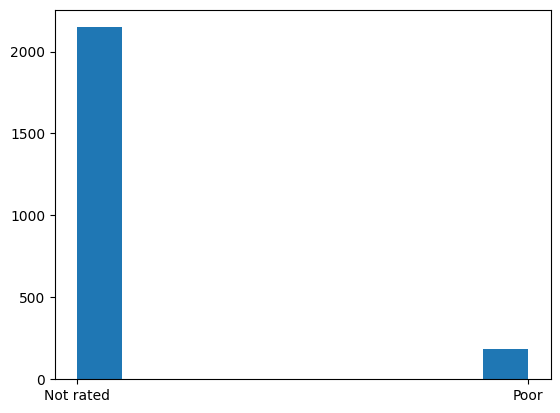

In [11]:
plt.hist(negative_data['Rating text'],label=negative_keywords)
plt.show()

# 1b)Calculate the average length of reviews andexplore if there is a relationship between review length and rating.

#task 2:Task: Votes Analysis
# 2a) Identify the restaurants with the highest and lowest number of votes.

In [12]:
highest_voted_restaurant=df.groupby("Restaurant Name")['Votes'].sum().sort_values()
highest_voted_restaurant=highest_voted_restaurant.idxmax()
print("the highest voted restaurant is:",highest_voted_restaurant)

the highest voted restaurant is: Barbeque Nation


In [14]:
lowest_rated_restaurant=df.groupby("Restaurant Name")['Votes'].sum().sort_values()
lowest_rated_restaurant=lowest_rated_restaurant.idxmin()
print("the lowest voted restaurant is:",lowest_rated_restaurant)

the lowest voted restaurant is: Moji Dhaba


# 2b)Analyze if there is a correlation between the number of votes and the rating of a restaurant.

In [16]:
correlation=np.corrcoef(df['Votes'],df['Aggregate rating'])
correlation=np.round(correlation,2)
print(correlation)

[[1.   0.31]
 [0.31 1.  ]]


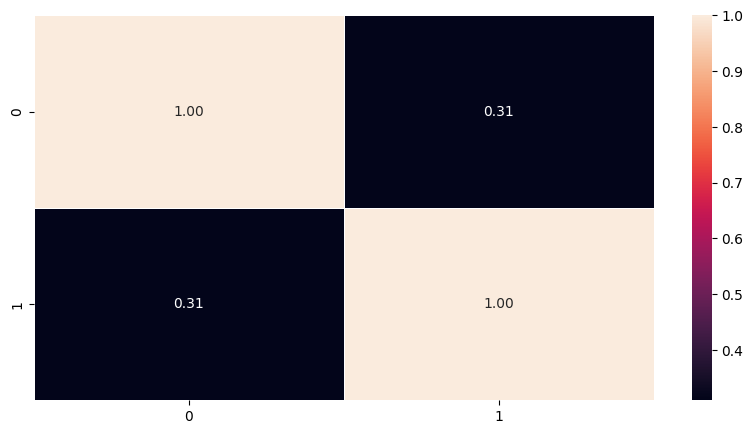

In [17]:
plt.figure(figsize=(10,5),dpi=100)
sns.heatmap(correlation,annot=True,fmt=".2f",linewidth=.4)
plt.show()

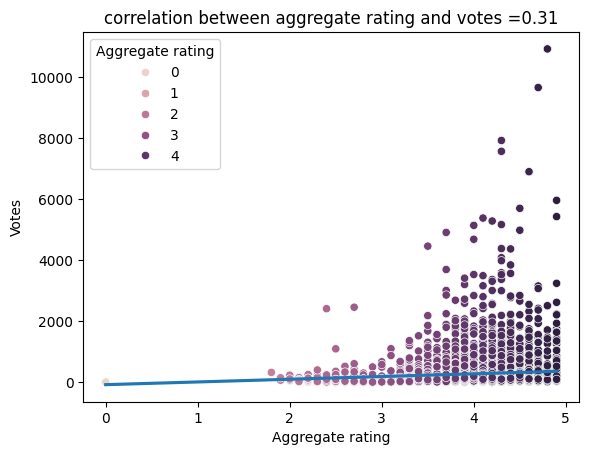

as per the correlation value=0.31,which indicates there is a moderate positive correlation between these two variables


In [20]:
sns.scatterplot(data=df,y='Votes',hue='Aggregate rating',x='Aggregate rating')
sns.regplot(data=df,x='Aggregate rating',y='Votes',scatter=False)
plt.title('correlation between aggregate rating and votes =0.31')
plt.show()
print("as per the correlation value=0.31,which indicates there is a moderate positive correlation between these two variables")

#task 3:Task: Price Range vs. Online Delivery and Table Booking
# Analyze if there is a relationship between the price range and the availability of online delivery and table booking.

In [21]:
x1=df['Has Online delivery']
y=df['Average Cost for two']
x2=df['Has Table booking']

# we need two charts
# plot 1 for online delivery with avg cost
# plpt 2 for table booking with avg cost

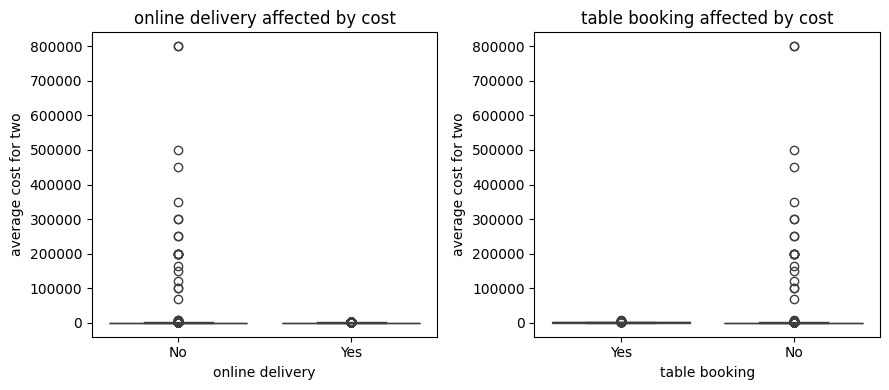

In [23]:
plt.figure(figsize=(9,4))
plt.subplot(1,2,1)
sns.boxplot(x=x1,y=y)
plt.xlabel("online delivery")
plt.ylabel("average cost for two")
plt.title("online delivery affected by cost")
plt.subplot(1,2,2)
sns.boxplot(x=x2,y=y)
plt.xlabel("table booking")
plt.ylabel("average cost for two")
plt.title("table booking affected by cost")
plt.tight_layout()
plt.show()

In [24]:
print("Both the online delivery and table booking are negatively impacted by the cost")

Both the online delivery and table booking are negatively impacted by the cost


# 3b) Determine if higher-priced restaurants are more likely to offer these services

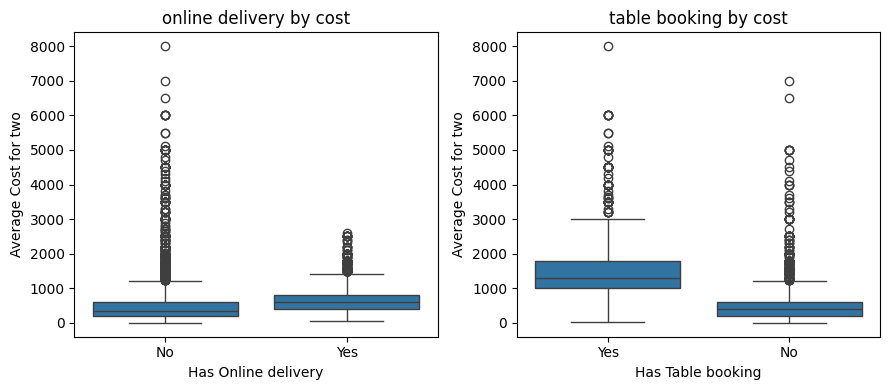

In [28]:
plt.figure(figsize=(9,4))
plt.subplot(1,2,1)
sns.boxplot(x=x1, y='Average Cost for two', data=df.loc[df['Average Cost for two']<10000])
plt.title("online delivery by cost")
plt.subplot(1,2,2)
sns.boxplot(x=x2, y='Average Cost for two', data=df.loc[df['Average Cost for two']<10000])
plt.title("table booking by cost")
plt.tight_layout()
plt.show()

In [30]:
print("the online delivery facility is present for only those restaurants where the avg cost is less than 1000")
print("the table booking facility is available in restaurants with an avg cost ranging from 1000 to 2000")

the online delivery facility is present for only those restaurants where the avg cost is less than 1000
the table booking facility is available in restaurants with an avg cost ranging from 1000 to 2000
